In [1]:
# Earthchem examples

In [20]:
from requests import get
import pandas as pd
import geopandas as gpd

from owslib.wfs import WebFeatureService

In [41]:
EARTHCHEM_WFS_URL = "http://ecp.iedadata.org/wfs/ows"
EARTHCHEM_REST_URL = "http://ecp.iedadata.org/restsearchservice"

In [42]:
params = dict(
    service="wfs",
    version="1.0.0",
    request="GetCapabilities",
    outputFormat='json'
)

wfs = WebFeatureService(EARTHCHEM_WFS_URL, version='1.0.0')

/home/rob65g/.local/conda/envs/earthchem/lib/python3.6/site-packages/owslib/util.py:541: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  if elements:


In [43]:
wfs.getcapabilities()

In [44]:
wfs.getfeature('EarthChem:EarthChemSamples')

ServiceException: Could not find type name E

In [ ]:
capabilities = wfs.getcapabilities()

In [ ]:
[o.name for o in wfs.operations]

In [104]:
parameters = dict(
    author="smi*",
    searchtype="rowdata",
    outputtype="json",
    showcolumnnames="yes",
    outputitems="sample_id,source,longitude,latitude"
)

In [105]:
result = get(EARTHCHEM_REST_URL, parameters).json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [106]:
result

{'Error': 'no search criteria set. please set a search item and try again.'}

In [100]:
from shapely.geometry import Point

records = []
for record in get(EARTHCHEM_REST_URL, parameters).json():
    loc = Point(float(record['longitude']), float(record['latitude']))
    other = {k: v for k, v in record.items() 
             if k not in ('latitude', 'longitude')}
    record = {'geometry': loc, **other}
    records.append(record)

TypeError: string indices must be integers

In [ ]:
df = gpd.GeoDataFrame.from_records(records)

In [101]:
from shapely import ops as shops
import matplotlib.pyplot as plt

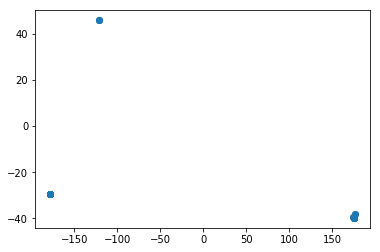

In [102]:
gpd.plotting.plot_point_collection(plt.gca(), df.geometry)

In [97]:
df.geometry

0        POINT (176.5 -38.12)
1     POINT (-121.854 45.938)
2     POINT (-121.854 45.938)
3     POINT (-121.854 45.938)
4        POINT (176.5 -38.12)
5       POINT (175.57 -39.82)
6       POINT (175.57 -39.82)
7       POINT (175.57 -39.82)
8       POINT (175.57 -39.82)
9       POINT (175.57 -39.82)
10      POINT (175.57 -39.82)
11      POINT (175.57 -39.82)
12     POINT (-177.87 -29.25)
13     POINT (-177.87 -29.25)
14     POINT (-177.87 -29.25)
15      POINT (175.57 -39.28)
16      POINT (175.57 -39.28)
17      POINT (175.57 -39.28)
18      POINT (175.57 -39.82)
19      POINT (175.57 -39.82)
20      POINT (175.57 -39.82)
21     POINT (-177.87 -29.25)
22     POINT (-177.87 -29.25)
23     POINT (-177.87 -29.25)
24     POINT (-177.87 -29.25)
25      POINT (175.57 -39.82)
26      POINT (175.57 -39.82)
27      POINT (175.57 -39.82)
28      POINT (175.57 -39.82)
29      POINT (175.57 -39.82)
30      POINT (175.57 -39.28)
31      POINT (175.57 -39.28)
32      POINT (175.57 -39.28)
33     POI

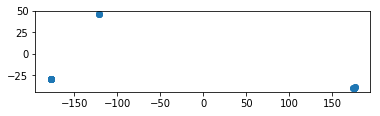

In [86]:
%matplotlib inline

df.plot()

In [63]:
import geojson

In [65]:
gpd.GeoDataFrame.from_records(geojson.loads(result))

,latitude,longitude,sample_id,source
0,-38.12,176.5,38010,GEOROC
1,45.938,-121.854,DS-26A-80,GEOROC
2,45.938,-121.854,DS-26A-80,GEOROC
3,45.938,-121.854,DS-26A-80,GEOROC
4,-38.12,176.5,46241,GEOROC
5,-39.82,175.57,R96/20,GEOROC
6,-39.82,175.57,R96/20,GEOROC
7,-39.82,175.57,R95/27,GEOROC
8,-39.82,175.57,T5-22,GEOROC
9,-39.82,175.57,R95/21,GEOROC
